# GenoML Demo for IPDGC London Workshop 2019

## Details
- **Put together by:** Hampton Leonard, Mary Makarious, and Mike Nalls
- **Project:** GenoML Demo for IPDGC London 2019 
- **PIs:** Mike Nalls, PhD and Andrew Singleton, PhD from the Laboratory of Neurogenetics NIH/NIA/NINDS
- **Collaborators:** Full list of collaborators [here](https://genoml.github.io/)
- **Date Last Updated:** 12.09.2019
	- Last Update: Initializing README and course folder on GitHub


## Description + Objective 

## Table of Contents
### [0. Getting Started](#0)
 1. ???
 2. ???
 
### [1. Data Munging](#1)
 1. ???
 2. ???
 
### [2. Training the Model](#2)
 1. ???
 2. ???
 
### [3. Tuning the Model](#3)
 1. ???
 2. ???
 
### [4. Testing the Model](#4)
 1. ???
 2. ???
 
### [5. Interpreting Results](#5)
 1. ???
 2. ???

<a id="0"></a>
## Part 0: Getting Started 

In [1]:
# Import the necessary packages 
import os
import sys
import argparse
import math
import time
import h5py
import joblib
import subprocess
import numpy as np
import pandas as pd

# Additional packages for VIF calculation
import random
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from joblib import Parallel, delayed

# Additional packages for training
import xgboost
import sklearn

# Additional packages for tuning
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_randfloat

In [2]:
# Add PLINK to path

filename = "plink"
directory = os.getcwd() + "/" + filename
os.environ["PATH"] = os.environ["PATH"] + os.pathsep + directory
!cd ./plink

# !plink --help

<a id="1"></a>
## Part 1: Data Munging

In [3]:
%run -i ./scripts/munging.py\
--prefix ./example_outputs/test_discrete_geno\
--pheno ./example_inputs/training_pheno.csv\
--geno ./example_inputs/training

## Does not include VIF filter!


Here is some basic info on the command you are about to run.
Python version info...
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
CLI argument info...
The output prefix for this run is ./example_outputs/test_discrete_geno and will be appended to later runs of GenoML.
Working with genotype data? ./example_inputs/training
Working with additional predictors? nope
Where is your phenotype file? ./example_inputs/training_pheno.csv
Any use for an external set of GWAS summary stats? nope
If you plan on using external GWAs summary stats for SNP filtering, we'll only keep SNPs at what P value? 0.001
How strong is your VIF filter? 0
How many iterations of VIF filtering are you doing? 0
The imputation method you picked is using the column median to fill in any remaining NAs.
Give credit where credit is due, for this stage of analysis we use code from the great contributors to python packages: os, sys, argparse, numpy, pandas, joblib, math and time. We also use PLI

<a id="2"></a>
## Part 2: Training the Model


Here is some basic info on the command you are about to run.
Python version info...
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
CLI argument info...
Are you ranking features, even though it is pretty slow? Right now, GenoML runs general recursive feature ranking. You chose to run this part.
Working with dataset ./example_outputs/test_discrete_geno from previous data munging efforts.
Give credit where credit is due, for this stage of analysis we use code from the great contributors to Python packages: argparse, xgboost, sklearn, pandas, numpy, time, matplotlib and seaborn.
As a note, in all exported probabilities and other graphics, case status is treated as a 0 or 1, with 1 representing a positive case.


Your data looks like this (showing the first few lines of the left-most and right-most columns)...
##############################
            PHENO    snp410_T    snp403_T    snp164_C    snp439_G    snp370_A  \
count  500.000000  500.000000  500.000

/Users/makariousmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/makariousmb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##############################
AdaBoostClassifier
AUC: 46.2090%
Accuracy: 56.6667%
Balanced Accuracy: 48.5171%
Log Loss: 0.6894
Runtime in seconds: 0.1784
##############################
GradientBoostingClassifier
AUC: 47.3571%
Accuracy: 65.3333%
Balanced Accuracy: 52.4516%
Log Loss: 0.7057
Runtime in seconds: 0.394
##############################
SGDClassifier
AUC: 46.7233%
Accuracy: 55.3333%
Balanced Accuracy: 46.7233%
Log Loss: 15.43
Runtime in seconds: 0.01102


/Users/makariousmb/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##############################
SVC
AUC: 52.8103%
Accuracy: 75.3333%
Balanced Accuracy: 50.0000%
Log Loss: 0.5814
Runtime in seconds: 0.3763


./scripts/training.py:124: RuntimeWarning: invalid value encountered in long_scalars
  NPV = TN/(TN+FN)


##############################
MLPClassifier
AUC: 50.3707%
Accuracy: 67.3333%
Balanced Accuracy: 55.5967%
Log Loss: 1.134
Runtime in seconds: 0.3792
##############################
KNeighborsClassifier
AUC: 53.0615%
Accuracy: 64.6667%
Balanced Accuracy: 54.7357%
Log Loss: 1.545
Runtime in seconds: 0.1352
##############################
LinearDiscriminantAnalysis
AUC: 46.1373%
Accuracy: 54.0000%
Balanced Accuracy: 50.3827%
Log Loss: 6.67
Runtime in seconds: 0.04789


/Users/makariousmb/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/makariousmb/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


##############################
QuadraticDiscriminantAnalysis
AUC: 49.1509%
Accuracy: 46.6667%
Balanced Accuracy: 49.1509%
Log Loss: 18.42
Runtime in seconds: 0.03284
##############################
BaggingClassifier
AUC: 53.6953%
Accuracy: 62.0000%
Balanced Accuracy: 51.1481%
Log Loss: 1.059
Runtime in seconds: 0.09855
##############################
XGBClassifier
AUC: 46.5200%
Accuracy: 64.0000%
Balanced Accuracy: 49.7489%
Log Loss: 0.6921
Runtime in seconds: 0.7234
##############################

This table below is also logged as ./example_outputs/test_discrete_geno.training_withheldSamples_performanceMetrics.csv and is in your current working directory...
##############################
                       Algorithm  AUC_Percent  Accuracy_Percent  \
0             LogisticRegression    47.763693         53.333333   
0         RandomForestClassifier    52.308060         64.666667   
0             AdaBoostClassifier    46.209041         56.666667   
0     GradientBoostingClassifier   

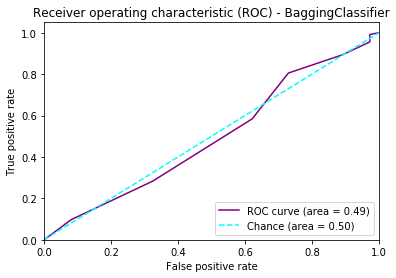

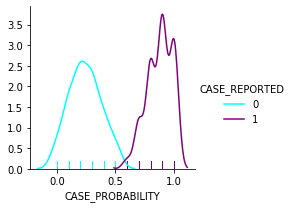

In [4]:
%run -i ./scripts/training.py\
--prefix ./example_outputs/test_discrete_geno\
--rank-features run

<a id="3"></a>
## Part 3: Tuning the Model

In [5]:
%run -i ./scripts/tuning.py\
--prefix ./example_outputs/test_discrete_geno\
--max-tune 10\
--n-cv 3

# FIXME: Module not callable error?

Here is some basic info on the command you are about to run.
Python version info...
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
CLI argument info...
Working with the dataset and best model corresponding to prefix ./example_outputs/test_discrete_geno the timestamp from the merge is the prefix in most cases.
Your maximum number of tuning iterations is 10 and if you are concerned about runtime, make this number smaller.
You are running 3 rounds of cross-valdiation, and again... if you are concerned about runtime, make this number smaller.
Give credit where credit is due, for this stage of analysis we use code from the great contributors to python packages: argparse, xgboost, sklearn, pandas, numpy, time, matplotlib and seaborn.
As a note, in all exported probabilities and other graphics, case status is treated as a 0 or 1, with 1 representing a positive case.


Your data looks like this (showing the first few lines of the left-most and right-most columns

TypeError: 'module' object is not callable

<a id="4"></a>
## Part 4: Testing the Model

In [6]:
## TODO

<a id="5"></a>
## Part 5: Interpreting the Results

In [7]:
## TODO